#### Credits

- 2021 Python for Machine Learning & Data Science Masterclass by Jose Portilla [Udemy](https://www.udemy.com/course/python-for-machine-learning-data-science-masterclass/)

In [44]:
# adjusting notebook layout
from IPython.core.display import display, HTML
display(HTML(
    '<style>'
        '#notebook { padding-top:0px !important; } ' 
        '.container { width:100% !important; } '
        '.end_space { min-height:0px !important; } '
    '</style>'
))

[Pandas](https://pandas.pydata.org/docs/) is an opensource library for data analysis for Python. It uses extremely powerful table object (DataFrame) system built off of NumPy.
- Tools for reading and writing data between many formats. Like directly read and write data from a SQL database, or from a website.
- Intelligently grab data based on indexing,logic, subsetting, and more.
- Handle missing data.
- Adjust and restructure data. 

It is not just Excel for Python but much more that. We will look into - 
* [Series](#Series)
* [DataFrames](#DataFrames)
* [Conditional Filtering](#Conditional_Filtering)
* [Useful Methods](#Useful_Methods)
* [Missing Data](#Missing_Data)
* [Group By Operations](#Group_By_Operations)
* [Combining DataFrames](#Combining_DataFrames)
* [Text Methods and Time Methods](#Text_Methods_and_Time_Methods)
* [Inputs and Outputs](#Inputs_and_Outputs)

In [1]:
import numpy as np
import pandas as pd
# help(pd.Series)

<a id='Series'></a>

# Series
A Series is very similar to a NumPy array (in fact it is built on top of the NumPy array object). What differentiates the NumPy array from a Series, is that a Series can have axis labels, meaning it can be indexed by a label, instead of just a number location. It also doesn't need to hold numeric data, it can hold any arbitrary Python Object.

### pd.Series()

In [2]:
myIdx  = ['USA', 'Canada', 'Mexico']
myData = [1776, 1867, 1821]

# creating a pandas series using list and 
# default numeric index like NumPy
mySer = pd.Series(data=myData)
print(mySer, '\n')

# also set labelled index (unlike NumPy) like a dict
mySer = pd.Series(data=myData, index=myIdx)
print(mySer, '\n')

print(mySer[0], mySer['USA'], '\n')

# creatre a series from a dict
ages = {'Sam':5, 'Frank':10, 'Spike':7}
print(pd.Series(ages))

0    1776
1    1867
2    1821
dtype: int64 

USA       1776
Canada    1867
Mexico    1821
dtype: int64 

1776 1776 

Sam       5
Frank    10
Spike     7
dtype: int64


### add()

In [3]:
#EXAMPLE
# Imaginary Sales Data for 1st and 
# 2nd Quarters or Global Company
q1 = {'Japan':80, 'China':450, 'India':200, 'USA':250}
q2 = {'Brazil':100,'China':500, 'India':210,'USA':260}

sales_q1 = pd.Series(q1)
sales_q2 = pd.Series(q2)

# since the Pandas series as based off of NumPy array
# we can have them broadcasted
print(sales_q1 * 2, '\n')

# Pandas can match thins up b/w two series 
# Notice how Pandas informs you of mismatch with NaN
print(sales_q1 + sales_q2, '\n')

# You can fill these with any value you want
print(sales_q1.add(sales_q2, fill_value=0), '\n')

print("Notice that the labels are now odered and \
numeric values are all floats!")

Japan    160
China    900
India    400
USA      500
dtype: int64 

Brazil      NaN
China     950.0
India     410.0
Japan       NaN
USA       510.0
dtype: float64 

Brazil    100.0
China     950.0
India     410.0
Japan      80.0
USA       510.0
dtype: float64 

Notice that the labels are now odered and numeric values are all floats!


<a id='DataFame'></a>

# DataFame
A DataFrame is a table of columns and rows in pandas that we can easily restructure and filter. DataFrames are an extremely powerful tool and a natural extension of the Pandas Series. By definition all a DataFrame is: a Pandas DataFrame consists of multiple Pandas Series that share index values.

### pd.DataFrame()

In [4]:
# creating a DataFrame from a np multi-D array
np.random.seed(101)
myData = np.random.randint(0,101,(4,3))
myIdx  = ['CA','NY','AZ','TX']
myCols = ['Jan', 'Feb', 'Mar']

# automatic numeric index
myDF = pd.DataFrame(data=myData)
print(myDF, '\n')

# provide labelled indices
myDF = pd.DataFrame(data=myData, index=myIdx)
print(myDF, '\n')

# provide labelled columns
myDF = pd.DataFrame(data=myData, index=myIdx, \
                    columns=myCols)
print(myDF, '\n')

# get general info about the DataFrame
myDF.info()

    0   1   2
0  95  11  81
1  70  63  87
2  75   9  77
3  40   4  63 

     0   1   2
CA  95  11  81
NY  70  63  87
AZ  75   9  77
TX  40   4  63 

    Jan  Feb  Mar
CA   95   11   81
NY   70   63   87
AZ   75    9   77
TX   40    4   63 

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, CA to TX
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Jan     4 non-null      int64
 1   Feb     4 non-null      int64
 2   Mar     4 non-null      int64
dtypes: int64(3)
memory usage: 128.0+ bytes


### info(), columns, index, head(), tail()

In [107]:
# creating a DataFrame from a CSV file
myDF = pd.read_csv('data/tips.csv')
print(myDF.info(), '\n')   # know the data
print(myDF.columns, '\n')  # column labels/names
print(myDF.index,   '\n')  # index labels/names
print(myDF.head(3), '\n')  # shows first n rows
print(myDF.tail(5), '\n')  # shows last n rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_bill        244 non-null    float64
 1   tip               244 non-null    float64
 2   sex               244 non-null    object 
 3   smoker            244 non-null    object 
 4   day               244 non-null    object 
 5   time              244 non-null    object 
 6   size              244 non-null    int64  
 7   price_per_person  244 non-null    float64
 8   Payer Name        244 non-null    object 
 9   CC Number         244 non-null    int64  
 10  Payment ID        244 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 21.1+ KB
None 

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size',
       'price_per_person', 'Payer Name', 'CC Number', 'Payment ID'],
      dtype='object') 

RangeIndex(start=0, stop=244, step=1) 

   total_bill

### round()

In [108]:
# rounding off using NumPy and Pandas DataFrame
#np.round(myDF, decimals=2) 
# OR directly use Pandas
myDF.round(decimals=2)[0:3]

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458


### describe().transpose()

In [109]:
# calculate simple stats for numeric columns
print("Note that some of these values don't make any \
sense like stats of CC Number!\n\n")
print(myDF.describe().transpose(),'\n') 

Note that some of these values don't make any sense like stats of CC Number!


                  count          mean           std           min  \
total_bill        244.0  1.978594e+01  8.902412e+00  3.070000e+00   
tip               244.0  2.998279e+00  1.383638e+00  1.000000e+00   
size              244.0  2.569672e+00  9.510998e-01  1.000000e+00   
price_per_person  244.0  7.888197e+00  2.914234e+00  2.880000e+00   
CC Number         244.0  2.563496e+15  2.369340e+15  6.040679e+10   

                           25%           50%           75%           max  
total_bill        1.334750e+01  1.779500e+01  2.412750e+01  5.081000e+01  
tip               2.000000e+00  2.900000e+00  3.562500e+00  1.000000e+01  
size              2.000000e+00  2.000000e+00  3.000000e+00  6.000000e+00  
price_per_person  5.800000e+00  7.255000e+00  9.390000e+00  2.027000e+01  
CC Number         3.040731e+13  3.525318e+15  4.553675e+15  6.596454e+15   



### Working with DataFrame columns

In [110]:
# access columns via a list of labels
myDF[['total_bill','tip']][:5]

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61


In [111]:
# operations on columns
100 *myDF['tip']/(myDF['tip']+myDF['total_bill'])

0       5.611111
1      13.833333
2      14.279886
3      12.263801
4      12.801418
         ...    
239    16.938484
240     6.854010
241     8.107013
242     8.942259
243    13.774105
Length: 244, dtype: float64

In [112]:
# override existing column
myDF['price_per_person'] = myDF['price_per_person'] + 1
myDF['price_per_person']

0       9.49
1       4.45
2       8.00
3      12.84
4       7.15
       ...  
239    10.68
240    14.59
241    12.34
242     9.91
243    10.39
Name: price_per_person, Length: 244, dtype: float64

### df['newCol'] = ...

In [113]:
# insert a new column in DataFrame
myDF['tip_percentage'] = 100 *myDF['tip']/(myDF['tip']+myDF['total_bill'])
# round off again for new cols
myDF.round(decimals=2).head(5) 

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,9.49,Christy Cunningham,3560325168603410,Sun2959,5.61
1,10.34,1.66,Male,No,Sun,Dinner,3,4.45,Douglas Tucker,4478071379779230,Sun4608,13.83
2,21.01,3.50,Male,No,Sun,Dinner,3,8.00,Travis Walters,6011812112971322,Sun4458,14.28
3,23.68,3.31,Male,No,Sun,Dinner,2,12.84,Nathaniel Harris,4676137647685994,Sun5260,12.26
4,24.59,3.61,Female,No,Sun,Dinner,4,7.15,Tonya Carter,4832732618637221,Sun2251,12.80


### drop()

In [114]:
# remove a column (always use the axis!)
#myDF.drop(labels='CC Number', axis=1)
#print(myDF.info()) # still has 12 cols
# inplace makes the changes permanent (NOT RECOMMENDED)
#myDF.drop(labels='CC Number', axis=1, inplace=True)
# RECOMMENDED
myDF = myDF.drop(labels='CC Number', axis=1)

# round off permanently
myDF = myDF.round(decimals=2) 
myDF.head(5)

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,Payment ID,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,9.49,Christy Cunningham,Sun2959,5.61
1,10.34,1.66,Male,No,Sun,Dinner,3,4.45,Douglas Tucker,Sun4608,13.83
2,21.01,3.50,Male,No,Sun,Dinner,3,8.00,Travis Walters,Sun4458,14.28
3,23.68,3.31,Male,No,Sun,Dinner,2,12.84,Nathaniel Harris,Sun5260,12.26
4,24.59,3.61,Female,No,Sun,Dinner,4,7.15,Tonya Carter,Sun2251,12.80


### Working with DataFrame rows

### set_index()

In [116]:
# setting up a column with uniques entries as 
# labels for the rows
myDF = myDF.set_index('Payment ID')
print("Payment ID is now the name of the index!", '\n\n')
myDF.head(5)

Payment ID is now the name of the index! 




,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,tip_percentage
Payment ID,,,,,,,,,,
Sun2959,16.99,1.01,Female,No,Sun,Dinner,2,9.49,Christy Cunningham,5.61
Sun4608,10.34,1.66,Male,No,Sun,Dinner,3,4.45,Douglas Tucker,13.83
Sun4458,21.01,3.50,Male,No,Sun,Dinner,3,8.00,Travis Walters,14.28
Sun5260,23.68,3.31,Male,No,Sun,Dinner,2,12.84,Nathaniel Harris,12.26
Sun2251,24.59,3.61,Female,No,Sun,Dinner,4,7.15,Tonya Carter,12.80


### reset_index()

In [117]:
# reset the index ()
myDF = myDF.reset_index()
print("Payment ID column goes to 1st place!", '\n\n')
myDF.head(5)

Payment ID column goes to 1st place! 




,Payment ID,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,tip_percentage
0,Sun2959,16.99,1.01,Female,No,Sun,Dinner,2,9.49,Christy Cunningham,5.61
1,Sun4608,10.34,1.66,Male,No,Sun,Dinner,3,4.45,Douglas Tucker,13.83
2,Sun4458,21.01,3.50,Male,No,Sun,Dinner,3,8.00,Travis Walters,14.28
3,Sun5260,23.68,3.31,Male,No,Sun,Dinner,2,12.84,Nathaniel Harris,12.26
4,Sun2251,24.59,3.61,Female,No,Sun,Dinner,4,7.15,Tonya Carter,12.80


### iloc[], loc[]

In [132]:
#myDF = myDF.set_index('Payment ID')
# grab a row(s) with integer-location (iloc)
myDF.iloc[0:4] # OR myDF[0:4] OR
# grab a row with (labelled) location (loc)
myDF.loc[['Sun2959','Sun4608','Sun4458','Sun5260']]

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,tip_percentage
Payment ID,,,,,,,,,,
Sun2959,16.99,1.01,Female,No,Sun,Dinner,2,9.49,Christy Cunningham,5.61
Sun4608,10.34,1.66,Male,No,Sun,Dinner,3,4.45,Douglas Tucker,13.83
Sun4458,21.01,3.50,Male,No,Sun,Dinner,3,8.00,Travis Walters,14.28
Sun5260,23.68,3.31,Male,No,Sun,Dinner,2,12.84,Nathaniel Harris,12.26


### drop()

In [135]:
# remove a row (note the axis is 0 by default)
myDF = myDF.drop('Sun2959')
myDF.head(5)

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,tip_percentage
Payment ID,,,,,,,,,,
Sun4608,10.34,1.66,Male,No,Sun,Dinner,3,4.45,Douglas Tucker,13.83
Sun4458,21.01,3.50,Male,No,Sun,Dinner,3,8.00,Travis Walters,14.28
Sun5260,23.68,3.31,Male,No,Sun,Dinner,2,12.84,Nathaniel Harris,12.26
Sun2251,24.59,3.61,Female,No,Sun,Dinner,4,7.15,Tonya Carter,12.80
Sun9679,25.29,4.71,Male,No,Sun,Dinner,4,7.32,Erik Smith,15.70


### slicing

In [137]:
# remove row(s) by slicing
myDF = myDF.iloc[2:]
myDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 241 entries, Sun5260 to Thur672
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_bill        241 non-null    float64
 1   tip               241 non-null    float64
 2   sex               241 non-null    object 
 3   smoker            241 non-null    object 
 4   day               241 non-null    object 
 5   time              241 non-null    object 
 6   size              241 non-null    int64  
 7   price_per_person  241 non-null    float64
 8   Payer Name        241 non-null    object 
 9   tip_percentage    241 non-null    float64
dtypes: float64(4), int64(1), object(5)
memory usage: 20.7+ KB


### append()

In [141]:
# inserting a new row
one_row = myDF.iloc[0]
myDF = myDF.append(one_row)
myDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242 entries, Sun5260 to Sun5260
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_bill        242 non-null    float64
 1   tip               242 non-null    float64
 2   sex               242 non-null    object 
 3   smoker            242 non-null    object 
 4   day               242 non-null    object 
 5   time              242 non-null    object 
 6   size              242 non-null    int64  
 7   price_per_person  242 non-null    float64
 8   Payer Name        242 non-null    object 
 9   tip_percentage    242 non-null    float64
dtypes: float64(4), int64(1), object(5)
memory usage: 20.8+ KB


<a id='Conditional_Filtering'></a>

# Conditional Filtering
The datasets are large enough that we don't filter based on position, but instead based on a *condition*. Conditional Flitering allows us to select **rows** based on a condition on a column.

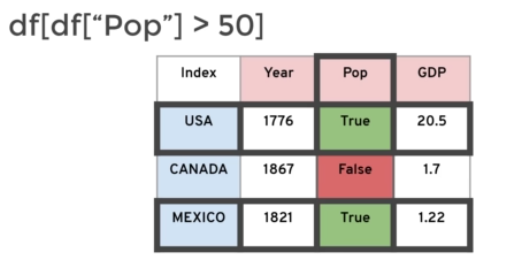

### read_csv()

In [169]:
# read the data
df = pd.read_csv('data/tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251


### boolean list

In [170]:
# filter by total_bill > 40
df[df['total_bill'] > 40]

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
59,48.27,6.73,Male,No,Sat,Dinner,4,12.07,Brian Ortiz,6596453823950595,Sat8139
95,40.17,4.73,Male,Yes,Fri,Dinner,4,10.04,Aaron Bentley,180026611638690,Fri9628
102,44.30,2.50,Female,Yes,Sat,Dinner,3,14.77,Heather Cohen,379771118886604,Sat6240
142,41.19,5.00,Male,No,Thur,Lunch,5,8.24,Eric Andrews,4356531761046453,Thur3621
156,48.17,5.00,Male,No,Sun,Dinner,6,8.03,Ryan Gonzales,3523151482063321,Sun7518
170,50.81,10.00,Male,Yes,Sat,Dinner,3,16.94,Gregory Clark,5473850968388236,Sat1954
182,45.35,3.50,Male,Yes,Sun,Dinner,3,15.12,Jose Parsons,4112207559459910,Sun2337
184,40.55,3.00,Male,Yes,Sun,Dinner,2,20.27,Stephen Cox,3547798222044029,Sun5140
197,43.11,5.00,Female,Yes,Thur,Lunch,4,10.78,Brooke Soto,5544902205760175,Thur9313
212,48.33,9.00,Male,No,Sat,Dinner,4,12.08,Alex Williamson,676218815212,Sat4590


### & or | oprators

In [171]:
# filter by total_bill > 40 and (sex is Male or time is Dinner
# NOTE : 'and' / 'or' operators in python '&' / '|' in Pandas
df[(df['total_bill'] > 40) & ( (df['sex'] == 'Male') | (df['time'] == 'Dinner') )]

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
59,48.27,6.73,Male,No,Sat,Dinner,4,12.07,Brian Ortiz,6596453823950595,Sat8139
95,40.17,4.73,Male,Yes,Fri,Dinner,4,10.04,Aaron Bentley,180026611638690,Fri9628
102,44.30,2.50,Female,Yes,Sat,Dinner,3,14.77,Heather Cohen,379771118886604,Sat6240
142,41.19,5.00,Male,No,Thur,Lunch,5,8.24,Eric Andrews,4356531761046453,Thur3621
156,48.17,5.00,Male,No,Sun,Dinner,6,8.03,Ryan Gonzales,3523151482063321,Sun7518
170,50.81,10.00,Male,Yes,Sat,Dinner,3,16.94,Gregory Clark,5473850968388236,Sat1954
182,45.35,3.50,Male,Yes,Sun,Dinner,3,15.12,Jose Parsons,4112207559459910,Sun2337
184,40.55,3.00,Male,Yes,Sun,Dinner,2,20.27,Stephen Cox,3547798222044029,Sun5140
212,48.33,9.00,Male,No,Sat,Dinner,4,12.08,Alex Williamson,676218815212,Sat4590


### isin()

In [172]:
# filter by specific days
df[(df['day'] == 'Sun') | (df['day'] == 'Sat') | (df['day'] == 'Fri')]
# smarter way -> .isin(options) menthod
days = ['Fri', 'Sat','Sun']
df[df['day'].isin(days)]

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251
...,...,...,...,...,...,...,...,...,...,...,...
238,35.83,4.67,Female,No,Sat,Dinner,3,11.94,Kimberly Crane,676184013727,Sat9777
239,29.03,5.92,Male,No,Sat,Dinner,3,9.68,Michael Avila,5296068606052842,Sat2657
240,27.18,2.00,Female,Yes,Sat,Dinner,2,13.59,Monica Sanders,3506806155565404,Sat1766
241,22.67,2.00,Male,Yes,Sat,Dinner,2,11.34,Keith Wong,6011891618747196,Sat3880


<a id='Useful_Methods'></a>

## Useful Methods

In [195]:
# read the data
df = pd.read_csv('data/tips.csv')

### apply()

In [196]:
# apply() method - apply and broadcast custom 
# functions on a DataFrame column

# function definition -- last four CC Numbers
lastFourNumbers = lambda num: str(num)[-4:]
# passing the function w/o args in apply()
df['last_four'] = df['CC Number'].apply(lastFourNumbers)

# function definition -- how pricy is it?
def yelp(price):
    if price < 10:
        return '$'
    elif price >= 10 and price < 30:
        return '$$'
    else:
        return '$$$'
# passing the function w/o args in apply()
df['yelp'] = df['total_bill'].apply(yelp)

df.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,last_four,yelp
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959,3410,$$
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608,9230,$$
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458,1322,$$
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260,5994,$$
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251,7221,$$


Check this stackoverflaw [link](https://stackoverflow.com/questions/19914937/applying-function-with-multiple-arguments-to-create-a-new-pandas-column) before moving on! 

In [209]:
# apply() method - apply and broadcast custom 
# functions on multiple DataFrame columns

# define a function -- tip quality?
def quality(total_bill, tip):
    if tip/total_bill > 0.25:
        return "Generous"
    else:
        return "Other"
# passing the function w/o args in apply()
df['Quality'] = df[['total_bill', 'tip']].apply( lambda df: quality(df['total_bill'], df['tip']), axis=1 )
df.head()
df.drop(labels='Quality', axis=1)
# a faster way it to VECTORIZE using numpy
df['Quality'] = np.vectorize(quality)(df['total_bill'], df['tip'])
df.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,last_four,yelp,Quality
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959,3410,$$,Other
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608,9230,$$,Other
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458,1322,$$,Other
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260,5994,$$,Other
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251,7221,$$,Other


### time the vectorized function

In [217]:
import timeit 
  
# code snippet to be executed only once 
setup = '''
import numpy as np
import pandas as pd
df = pd.read_csv('data/tips.csv')
def quality(total_bill,tip):
    if tip/total_bill  > 0.25:
        return "Generous"
    else:
        return "Other"
'''
  
# code snippet whose execution time is to be measured 
stmt_one = ''' 
df['Tip Quality'] = df[['total_bill','tip']].apply(lambda df: quality(df['total_bill'],df['tip']),axis=1)
'''

stmt_two = '''
df['Tip Quality'] = np.vectorize(quality)(df['total_bill'], df['tip'])
'''

print(timeit.timeit(setup=setup, stmt=stmt_one, number=1000))
print(timeit.timeit(setup=setup, stmt=stmt_two, number=1000))

3.1651286499982234
0.38754928900743835


The *quality()* funciton is NOT numpy-aware, so vectorizing it makes it numpy-aware and indeed faster!

In [221]:
# read the data
df = pd.read_csv('data/tips.csv')

### describe()

In [225]:
# check some statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,1.978594e+01,8.902412e+00,3.070000e+00,1.334750e+01,1.779500e+01,2.412750e+01,5.081000e+01
tip,244.0,2.998279e+00,1.383638e+00,1.000000e+00,2.000000e+00,2.900000e+00,3.562500e+00,1.000000e+01
size,244.0,2.569672e+00,9.510998e-01,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
price_per_person,244.0,7.888197e+00,2.914234e+00,2.880000e+00,5.800000e+00,7.255000e+00,9.390000e+00,2.027000e+01
CC Number,244.0,2.563496e+15,2.369340e+15,6.040679e+10,3.040731e+13,3.525318e+15,4.553675e+15,6.596454e+15


### sort_values()

In [228]:
# sort by values (highest to lowest)
# it doesn't actaully reorder the DataFrame 
# indexing but it just sorts the DataFrame 
# by the particular column(s) used for sorting 
df.sort_values('tip', ascending=False).head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
170,50.81,10.00,Male,Yes,Sat,Dinner,3,16.94,Gregory Clark,5473850968388236,Sat1954
212,48.33,9.00,Male,No,Sat,Dinner,4,12.08,Alex Williamson,676218815212,Sat4590
23,39.42,7.58,Male,No,Sat,Dinner,4,9.86,Lance Peterson,3542584061609808,Sat239
59,48.27,6.73,Male,No,Sat,Dinner,4,12.07,Brian Ortiz,6596453823950595,Sat8139
141,34.30,6.70,Male,No,Thur,Lunch,6,5.72,Steven Carlson,3526515703718508,Thur1025


In [234]:
# sort by multiple values here the sorting 
# happens for the first label
# and then the next and so on ...
df.sort_values(['tip', 'size'])

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
67,3.07,1.00,Female,Yes,Sat,Dinner,1,3.07,Tiffany Brock,4359488526995267,Sat3455
111,7.25,1.00,Female,No,Sat,Dinner,1,7.25,Terri Jones,3559221007826887,Sat4801
92,5.75,1.00,Female,Yes,Fri,Dinner,2,2.88,Leah Ramirez,3508911676966392,Fri3780
236,12.60,1.00,Male,Yes,Sat,Dinner,2,6.30,Matthew Myers,3543676378973965,Sat5032
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
...,...,...,...,...,...,...,...,...,...,...,...
141,34.30,6.70,Male,No,Thur,Lunch,6,5.72,Steven Carlson,3526515703718508,Thur1025
59,48.27,6.73,Male,No,Sat,Dinner,4,12.07,Brian Ortiz,6596453823950595,Sat8139
23,39.42,7.58,Male,No,Sat,Dinner,4,9.86,Lance Peterson,3542584061609808,Sat239
212,48.33,9.00,Male,No,Sat,Dinner,4,12.08,Alex Williamson,676218815212,Sat4590


### min(), max()

In [245]:
# grab values of min / max values
df['total_bill'].min(), df['total_bill'].max()

(3.07, 50.81)

In [246]:
# grab locations of min / max values
df['total_bill'].idxmin(), df['total_bill'].idxmax()

(67, 170)

In [247]:
df.iloc[[67, 170]]

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
67,3.07,1.0,Female,Yes,Sat,Dinner,1,3.07,Tiffany Brock,4359488526995267,Sat3455
170,50.81,10.0,Male,Yes,Sat,Dinner,3,16.94,Gregory Clark,5473850968388236,Sat1954


### corr()

In [251]:
# how correlated the column values are with
# each other (for numeric columns only)
# -1 => fully uncorrelated
#  1 => fully correlated
df.corr()

,total_bill,tip,size,price_per_person,CC Number
total_bill,1.000000,0.675734,0.598315,0.647554,0.104576
tip,0.675734,1.000000,0.489299,0.347405,0.110857
size,0.598315,0.489299,1.000000,-0.175359,-0.030239
price_per_person,0.647554,0.347405,-0.175359,1.000000,0.135240
CC Number,0.104576,0.110857,-0.030239,0.135240,1.000000


### value_counts()

In [252]:
# counts per possible entry in a catagorical column
df['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

### unique(), nunique()

In [264]:
# unique entries in the dataset
df['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [262]:
# number of unique entries in the dataset
df['day'].nunique() # OR len(df['day'].unique())

4